In [17]:
%pdb on
debug = 0
_debug_indent = 0
def dbg(msg,sev=1):
    indent = "    "
    if debug >= sev:
        print "DBG: " + (indent * _debug_indent) + msg
        
def dbg_indent(lvl=None):
    global _debug_indent
    if lvl is None:
        lvl = 1
    _debug_indent = max((_debug_indent + lvl,0))
    
    
def dbg_outdent(lvl=None):
    if lvl is None:
        lvl = 1
    dbg_indent(-1 * lvl)
    

Automatic pdb calling has been turned ON


In [51]:
import types
def clean_string(s):
    """
    Given a string, return a version with the following rules applied:
      - no whitespace on either end
      - all lower-case
    """
    return s.lower().strip()

def clean_strings(s):
    """
    Given a dict, list, or string of skill strings in the format:
        category: [category:...] skill [, skill...]
    update all strings therein, such that they conform to the following rules:
      - each comma-delimeter skill becomes its own value
      - all values formatted according to `clean_string()`
      - only one instance per value (post-formatting)
    Input types map to return types as follows:
      dict     -> dict
      iterable -> list
      string   -> list (because comma-delimeted skills explode)
    """
    if type(s) == dict:
        for k,v in s.items():
            clean_k = clean_string(k)
            clean_v = clean_strings(v)
            if clean_k != k:
                #if s.has_key(clean_k):
                #    raise Exception("Cleaned version of '%s' duplicates an existing key! (%s)" % (k,clean_k))
                del(s[k])
            s[clean_k] = clean_v
        skills = s
    elif hasattr(s,"__iter__"):
        skills = []
        for skill in s:
            for clean_skill in clean_strings(skill):
                #if clean_skill in skills:
                #    raise Exception("Cleaned version of '%s' duplicates an existing value! (%s)" % (skill,clean_skill))
                if clean_skill not in skills:
                    skills.append(clean_skill)
    elif type(s) in types.StringTypes:
        tokens = [ t.lower().strip() for t in s.split(":") ]
        prefix = tokens[:-1]
        skills = []
        for skill in [ skill.lower().strip() for skill in tokens[-1].split(",") ]:
            if skill is not None and skill not in skills:
                clean_skill = ":".join([ x for x in prefix + [skill] ])
                #if clean_skill in skills:
                #    raise Exception("Cleaned version of '%s' duplicates an existing value! (%s)" % (skill,clean_skill))
                skills.append(clean_skill)
            else:
                raise Exception("Malformed skill string '%s'" % skill)
    else:
        raise Exception("Cannot parse skill string of incompatible type %s: %s" % (type(s),s))
    return skills

# Automated discovery of learning paths and goals 

## Toward a GPS for your curriculum map

### *"Let the robots tell us what to learn. What could possibly go wrong?"*

# Task One: What have you got?

**Note:** *creating a taxonomy of all human knowledge is ~~really hard~~ outside the scope of this talk*

```yaml
Hello World:
  Description: "Write a script that prints 'hello world'"
  Provides:
  # All skills are implicitly within the `Python:` namespace
    - "Script: edit, make executable"
    - "Output: print"
```

---
```yaml
What's Your Name?:
  Description: "Write a script that prompts for and prints a string"
  Requires:
    - "Script: edit, make executable"
    - "Output: print"
    - "Variable: overview, set"
  Provides:
    - "Input: CLI prompt"
    - "String: variable interpolation"
```

In [52]:
clean_strings([
        "Script: edit, make executable",
        "Script: edit  , make executable",  # <-- duplicate, but for the whitespace
        "Output: print",
        "Many: layers: deep",  
])

['script:edit', 'script:make executable', 'output:print', 'many:layers:deep']

In [53]:
import types
def clean_string(s):
    """
    Given a string, return a version with the following rules applied:
      - no whitespace on either end
      - all lower-case
    """
    return s.lower().strip()

def clean_strings(s):
    """
    Given a dict, list, or string of skill strings in the format:
        category: [category:...] skill [, skill...]
    update all strings therein, such that they conform to the following rules:
      - each comma-delimeter skill becomes its own value
      - all values formatted according to `clean_string()`
      - only one instance per value (post-formatting)
    Input types map to return types as follows:
      dict     -> dict
      iterable -> list
      string   -> list (because comma-delimeted skills explode)
    """
    if type(s) == dict:
        for k,v in s.items():
            clean_k = clean_string(k)
            clean_v = clean_strings(v)
            if clean_k != k:
                #if s.has_key(clean_k):
                #    raise Exception("Cleaned version of '%s' duplicates an existing key! (%s)" % (k,clean_k))
                del(s[k])
            s[clean_k] = clean_v
        skills = s
    elif hasattr(s,"__iter__"):
        skills = []
        for skill in s:
            for clean_skill in clean_strings(skill):
                #if clean_skill in skills:
                #    raise Exception("Cleaned version of '%s' duplicates an existing value! (%s)" % (skill,clean_skill))
                if clean_skill not in skills:
                    skills.append(clean_skill)
    elif type(s) in types.StringTypes:
        tokens = [ t.lower().strip() for t in s.split(":") ]
        prefix = tokens[:-1]
        skills = []
        for skill in [ skill.lower().strip() for skill in tokens[-1].split(",") ]:
            if skill is not None and skill not in skills:
                clean_skill = ":".join([ x for x in prefix + [skill] ])
                #if clean_skill in skills:
                #    raise Exception("Cleaned version of '%s' duplicates an existing value! (%s)" % (skill,clean_skill))
                skills.append(clean_skill)
            else:
                raise Exception("Malformed skill string '%s'" % skill)
    else:
        raise Exception("Cannot parse skill string of incompatible type %s: %s" % (type(s),s))
    return skills

```yaml
Hello World:
  Description: "Write a script that prints 'hello world'"
  Provides:
    - "Script: edit, make executable"
    - "Output: print"
```
---
```yaml
Hello World (adding a variable):
  Description: "Write a script that prints a variable set to 'hello world' (or something else)"
  Extends:
    - "Hello World"
  Provides:
    - "Variable: overview, set"
    - "String: variable interpolation"
```
---

```yaml
What's Your Name?:
  Description: "Write a script that prompts for and prints a string"
  Requires:
    - "Script: edit, make executable"
    - "Output: print"
    - "Variable: overview, set"
  Provides:
    - "Input: CLI prompt"
    - "String: variable interpolation"
```

In [83]:
library_yaml = """
---
Hello World:
  Provides: 
    - "Output: print"
    
Hello X (custom msg):
  Requires: 
    - "Output: print"
  Provides:
    - "Variables: set, get"
    
What's Your Name?:
  Requires:
    - "Output: print"
  Provides:
    - "Input: prompt: CLI"
    
Say Hello 10 Times:
  Requires:
    - "Output: print"
  Provides: 
    - "Control: while"
    
Solve Simple Math Problems:
  Requires: 
    - "Output: print"
  Provides:
    - "Math: add, subtract, multiply, divide"
    
Solve Fancier Math Problems:
  Extends: 
    - "Solve Simple Math Problems"
  Provides:
    - "Math: exponents, modulo"
    
Roll the Dice:
  Requires:
    - "Variables: set, get"
    - "Math: modulo"
  Provides:
    - "Control: if, else"
    - "Random: random.rand"
    
A Questionably Designed Project:
  Requires:
    - "Networking: sockets"
    - "Graphics: 3D modeling: wireframes"
    - "Sound: Music: composition"
  Provides:
    - "Math: modulo"
    
Simple Menu:
  Requires:
    - "Output: print"
    - "Input: prompt: CLI"
    - "Control: while, if, else"
"""

In [20]:
big_library_yaml = """
---
Hello World:
  Description: "Write a script that prints 'hello world'"
  Provides:
    - "Script: edit, make executable"
    - "Output: print"
    
Hello World (adding a variable):
  Description: "Write a script that prints a variable set to 'hello world' (or something else)"
  Extends: 
    - "Hello World"
  Provides:
    - "Variable: overview, set"
    - "String: variable interpolation"
  
What's Your Name?:
  Description: "Write a script that prompts for and prints a string"
  Requires:
    - "Script: edit, make executable"
    - "Output: print"
    - "Variable: overview, set"
  Provides:
    - "Input: CLI prompt"
    - "String: variable interpolation"
    
Ask Anything:
  Description: "Write a function that prints an arbitrary prompt and returns the response"
  Requires:
    - "Script: edit, make executable"
    - "Input: CLI prompt"
    - "String: variable interpolation"
    - "Output: print"
  Provides:
    - "Functions: overview, arguments, return"
    
Smarter Ask Anything:
  Description: "Add output that varies by response to Ask Anything"
  Extends:
    - "Ask Anything"
  Provides:
    - "Control: if, elif, else"
    
Logging Ask Anything:
  Description: "Add conversation log file to Smarter Ask Anything"
  Extends:
    - "Smarter Ask Anything"
  Provides:
    - "Output: file"
    
String Tokenizer:
  Description: "Parse a list of comma-separated values and print them individually"
  Requires:
    - "Script: edit, make executable"
    - "Output: print"
  Provides:
    - "Input: CLI arguments"
    - "String: split"
    - "String: variable interpolation"
    
Simple Calculator:
  Description: "Accept simple RPN expressions as arguments and print result"
  Requires:
    - "Script: edit, make executable"
    - "Output: print"
    - "Control: if, elif, else"
  Provides:
    - "Input: CLI arguments"
    - "String: split"
    - "String: variable interpolation"
    - "Math: arithmetic"
    
Re-usable Calculator:
  Description: "Extend the Simple Calculator project so it can be executed or imported as a module"
  Extends:
    - "Simple Calculator"
  Provides:
    - "Module: overview, create, import"
    - "Script: Importable"
    
Simple Menu:
  Description: "Write a program the prompts the user to select options from a menu"
  Requires:
    - "Script: edit, make executable"
    - "Input: CLI prompt"
    - "Output: print"
    - "Function: overview, arguments, return"
  Provides:
    - "Loop: while"
    - "Input: CLI Menu"
    - "Script: return"  
    - "Output: stderr"
    
Write Fibonacci numbers to a file:
  Description: "Write the first 100 Fibonacci numbers to a file called fibonacci.txt"
  Requires:
    - "Script: edit, make executable"
    - "Loop: while"
    - "Math: arithmetic"
  Provides: 
    - "Output: file"
    
FizzBuzz:
  Description: "The classic 'FizzBuzz' problem. https://en.wikipedia.org/wiki/Fizz_buzz"
  Requires:
    - "Script: edit, make executable"
    - "Loop: for, range"
    - "String: variable interpolation"
  Provides:
    - "Control: if, elif, else"
        
Simple Text Adventure from XML data files:
  Description: "Read an XML file with descriptions of 'rooms', guide user through them"
  Requires:
    - "Script: edit, make executable"
    - "Input: CLI prompt"
    - "Control: if, else"
    - "Function: definition, arguments, return values"
    - "XML: overview"
    - "Dictionary: creation"
    - "Dictionary: Methods: keys, values, items"
    - "Input: CLI Menu"
    - "Input: file"
  Provides:
    - "Input: XML"
    - "XML: Xpath: query by tag"
    - "Class: overview, creation"
    - "Class: Methods: __init__, __repr__"
  
Debugging with Decorators:
  Description: "Write a program with function decorators for optional error logging"
  Requires:
    - "Script: edit, make executable"
    - "Function: arguments, return values"
  Provides:
    - "Functions: decorators"
    - "Output: stderr"
  
Flask Hello World:
  Description: "Write a Flask web application that displays 'Hello World'"
  Requires:
    - "Strings: variable interpolation"
    - "Function: decorators"
    - "Function: return values"
  Provides:
    - "Flask: create app"
    - "Script: importable"
    - "String: concatenation"
    
Flask What's Your Name?:
  Description: "Write a Flask web application that prompts for a string and displays a customized response"
  Requires:
    - "Flask: Create app"
    - "String: variable interpolation"
  Provides:
    - "AJAX: overview"
    - "Flask: Input: form"
    - "Flask: Output: update div"
    
Adapt your text adventure for the web:
  Description: "Adapt the Simple Text Adventure project into a Flask web application"
  Extends:
    - "Simple Text Adventure from XML data files"
  Requires:
    - "Script: Importable"
    - "Flask: Create app"
    - "AJAX: overview"
    - "Flask: Input: form"
    - "Flask: Output: update div"
"""

# Class `ProjectLibary`
* Initialized with: `projects {}`
* Important properties:
  * Basically A bunch of indexes hashes: `THING_by_KEY`
    * `projects_by_skills_required`
    * `projects_by_skills_provided`
    * `skills_provided_by_project`
    * `skills_required_by_project`
  * ...*but* always exposed via methods.

In [82]:
import yaml
class ProjectLibrary(object):
    @staticmethod
    def from_yaml_file(fn):        
        swagifacts_yml = open(fn,"r").read()
        return ProjectLibrary.from_yaml(swagifacts_yml)
            
    @staticmethod
    def from_yaml(yaml_text):
        return ProjectLibrary(yaml.load(yaml_text))  
        
    def __init__(self,projects={}):
        self.skills_provided_by_project = {}
        self.projects_by_skill_provided = {}
        self.skills_required_by_project = {}
        self.projects_by_skill_required = {}
        self.project_dependencies = {}
        self.projects_raw = {}
        self.add_projects(projects)
        
    def add_projects(self,projects):
        projects = clean_strings(projects)
        self.projects_raw.update(projects)
        (self.skills_provided_by_project,
         self.skills_required_by_project,
         self.projects_by_skill_required,
         self.projects_by_skill_provided,
         self.projects_that_extend,
         self.projects_extended_by
         ) = self._index_projects()
                     
    def _index_projects(self,projects=None,follow_extensions=False):
        if projects is None:
            projects = self.project_data()
         
        skills_provided_by_project = {}
        skills_required_by_project = {}
        projects_by_skill_required = {}
        projects_by_skill_provided = {}
        projects_that_extend = {}
        projects_extended_by = {}
        
        for project_name,props in projects.items():
            #(provides,requires) = self.get_skills(project_name,follow_extensions)
            provides = self.skills_provided_by(project_name,follow_extensions)
            requires = self.skills_required_by(project_name,follow_extensions)
            
            skills_provided_by_project[project_name] = set()
            for skill in provides:
                skills_provided_by_project[project_name].add(skill)
                if not projects_by_skill_provided.has_key(skill):
                    projects_by_skill_provided[skill] = set()
                projects_by_skill_provided[skill].add(project_name)
                
            skills_required_by_project[project_name] = set()
            for skill in requires:
                skills_required_by_project[project_name].add(skill)
                if not projects_by_skill_required.has_key(skill):
                    projects_by_skill_required[skill] = set()
                projects_by_skill_required[skill].add(project_name)
                    
            projects_extended_by[project_name] = set()
            if props.has_key('extends'):
                for extends in (props['extends']):
                    projects_extended_by[project_name].add(extends)
                    if not projects_that_extend.has_key(extends):
                        projects_that_extend[extends] = set()
                    projects_that_extend[extends].add(project_name)
         
        return(skills_provided_by_project,
            skills_required_by_project,
            projects_by_skill_required,
            projects_by_skill_provided,
            projects_that_extend,
            projects_extended_by)
    
    def project_data(self):
        return self.projects_raw
    
    def project_names(self):
        return self.projects_raw.keys()
    
    def skills_verbed_by(self,project_name,skill_verb,follow_extensions=False):
        project_name = clean_string(project_name)
        project_data = self.projects_raw[project_name]
        skills = set()
        if project_data.has_key(skill_verb):
            skills.update(clean_strings(project_data[skill_verb]))
        if follow_extensions and project_data.has_key("extends"):
            for extends in project_data["extends"]:
                e = self.get_skills_verbed(extends,skill_verb,follow_extensions)
                skills.update(e)               
        return skills
    
    def skills_required_by(self,project_name,follow_extensions=False):
        return self.skills_verbed_by(project_name,"requires",follow_extensions)
    
    def skills_provided_by(self,project_name,follow_extensions=False):
        return self.skills_verbed_by(project_name,"provides",follow_extensions)
        
    def projects_that_provide(self,skill):
        res = set()
        for skill in clean_strings(skill):
            res.update(self.projects_by_skill_provided.get(skill,[]))
        return res
    
    def projects_that_require(self,skill):
        res = set()
        for skill in clean_strings(skill):
            res.update(self.projects_by_skill_required.get(skill,[]))
        return res     
    
    def assessments_for(self, desired_skills, relevance_weight=1, completeness_weight=1, quality_weight=1, overlap_weight=1):
        desired_skills         = clean_strings(desired_skills)
        orphan_skills          = set()
        candidate_projects     = set() 
        project_relevance      = {}
        project_completeness   = {}
        project_skills_overlap = {}
        project_quality = {}
        
        for skill in desired_skills:
            required_by = self.projects_that_require(skill)
            if len(required_by) == 0:
                orphan_skills.add(skill)
                continue
                
            shared_with_cnt = len(required_by) - 1
            for project in required_by:
                # Update the list of projects to be scored
                candidate_projects.add(project)
                
                # Update the number of relevant skills for this project.
                # This is not the final relevance score. It will be used to 
                # calculate, and will then be replaced with, the actual 
                # relevance score in the next loop.
                if not project_relevance.has_key(project):
                    project_relevance[project] = 0
                project_relevance[project] += 1     
                
                # Note how many other candidate projects required this skill
                if not project_skills_overlap.has_key(project):
                    project_skills_overlap[project] = {}
                if not project_skills_overlap[project].has_key(shared_with_cnt):
                    project_skills_overlap[project][shared_with_cnt] = set()
                project_skills_overlap[project][shared_with_cnt].add(skill) 
                
        # Now that we have the number of relevant skills for each
        # project, iterate once more and compare that to the total
        # number of skills required to get a relevance score
        for project in candidate_projects:
            required = self.skills_required_by(project)
            required_cnt = float(len(required))
            relevant_cnt = float(project_relevance[project])
            # % of required skills that are on the desired list
            project_relevance[project] = (relevant_cnt / required_cnt)
            project_relevance[project] *= relevance_weight
            # % of desired skills required by this project
            project_completeness[project] = (relevant_cnt / len(desired_skills))
            project_completeness[project] *= completeness_weight
            # Quality metric based on 
            provided_cnt = float(len(self.skills_provided_by(project)))
            project_quality[project] = 1.0 / (1+(float(provided_cnt)/required_cnt))
            project_quality[project] *= quality_weight
            
        # Build a frequency distribution map showing how
        # many skills are shared between projects
        #project_skills_overlap = self.project_skills_overlap(desired_skills,candidate_projects)
                
        maxloops = 10
        for loop in xrange(0,maxloops+1):
            dbg("Beginning loop %s" % loop)
            dbg_indent()
            
            # Calculate scores
            projects_by_score = {}
            for project in candidate_projects:
                
                # % of required skills that are on the desired list
                relevance = project_relevance[project]
                
                # % of desired skills required by this project
                completeness = project_completeness[project]
                
                # Ratio of skills assessed to skills taught.
                # A good assessment does more assessment of existing skills
                # than teaching of new ones
                quality = project_quality[project]
                    
                # tiebreaker based on how many relevant skills are shared 
                # with other candidates, combined with the quality metric
                overlap = quality 
                for frequency,skills in project_skills_overlap[project].items():
                    overlap += frequency * len(skills)
                
                # Calculate the base score...
                score = relevance + completeness + quality
                
                # ...but if all of the skills required by this project
                # are also provided by other projects, make it a 
                # candidate for removal. This is indicated by a
                # negative score, with worse scores further from
                # zero than good scores.
                if not project_skills_overlap[project].has_key(0):
                    score = -1.0 / score
                    
                dbg("Score for %s = %s, from base score %s = rel(%s) * com(%s), qul(%s)" % (
                        project,score,relevance*completeness*quality,relevance,completeness,quality))
                dbg("Overlap for %s is %s, based on %s" % (project,overlap,project_skills_overlap[project]),sev=2)
                if not projects_by_score.has_key(score):
                    projects_by_score[score] = {}
                if not projects_by_score[score].has_key(overlap):
                    projects_by_score[score][overlap] = set()
                projects_by_score[score][overlap].add(project)
            
            # If the project with the lowest score is negative, that project
            # is also redundant and can be removed from the list of candidates
            worst_score = sorted(projects_by_score.keys())[0]
            if worst_score < 0:
                worst_overlap = sorted(projects_by_score[worst_score].keys())[0]
                # Orf wif its head!
                ded = projects_by_score[worst_score][worst_overlap].pop()
                candidate_projects.remove(ded)
                for overlap,skills in project_skills_overlap[ded].items():
                    new_overlap = overlap - 1
                    for skill in skills:
                        for project in self.projects_that_require(skill).intersection(candidate_projects):
                            if not project_skills_overlap[project].has_key(new_overlap):
                                project_skills_overlap[project][new_overlap] = set()
                            project_skills_overlap[project][overlap].remove(skill)
                            project_skills_overlap[project][new_overlap].add(skill)
                del(project_skills_overlap[ded])
                
                dbg("Removing %s with score %s, overlap %s" % (ded,worst_score,worst_overlap))
                if len(projects_by_score[worst_score][worst_overlap]) == 0:
                    del(projects_by_score[worst_score][worst_overlap])
                    if len(projects_by_score[worst_score]) == 0:
                        del(projects_by_score[worst_score])
            else:
                dbg("All remaining projects have at least one unique requirement; Can't remove any more!")
                dbg_outdent()
                break
                
            dbg("Candidates at end of loop %s: %s" % (loop,", ".join(candidate_projects)))
            if loop == maxloops:
                dbg("Maximum loops hit! There may be a problem.")
                
            dbg_outdent()
          
        return (candidate_projects,orphan_skills)
    
    def as_graph(self,fmt=None):
        return LibraryGraph(self,fmt)
            


# Class `ProjectLibrary`
## Example usage

In [22]:
library = ProjectLibrary.from_yaml(library_yaml)

In [23]:
library.projects_that_provide("Output: print")

{'hello world'}

In [24]:
library.projects_that_require("Output: print")

{'hello x (custom msg)',
 'say hello 10 times',
 'simple menu',
 'solve simple math problems',
 "what's your name?"}

In [25]:
# Look up skills by project
library.skills_required_by("solve simple math problems")

{'output:print'}

In [26]:
library.skills_provided_by("solve simple math problems")

{'math:add', 'math:divide', 'math:multiply', 'math:subtract'}

# Task Two:  where do you want to go?
**Given:** a set of desired skills

**Produce:** the smallest set of assessment projects that collectively test them all 

   *(bonus: favor projects with overlapping requirements)*

# What makes a good assessment?

### How would you assess the ability to use `output: print`?

In [84]:
library = ProjectLibrary.from_yaml("""
---
Hello World:
  Description: "Print the string 'Hello World' (or something else)"
  Provides: 
    - "Output: print"
    
What's Your Name?:
  Description: "Prompt the user for a name, then greet them by name"
  Requires:
    - "Output: print"
  Provides:
    - "Variables: set, get"
    - "Input: prompt: CLI"
    - "String: variable interpolation"
    
Say Hello 10 Times:
  Description: "Print the string 'Hello World' (or something else) ten times, using a while loop"
  Requires:
    - "Output: print"
  Provides: 
    - "Loop: while"
""")

In [85]:
# Outputs (set(recommended assesments...), set(unmatched skills...))
library.assessments_for("output: print")

({'say hello 10 times'}, set())

## Factor 1:  application vs introduction of skills
*"Is this project more about introducing (`provides`) or applying (`requires`) skills?"*


$$\frac{1}{1+\frac{\#\ skills\ taught}{\#\ skills\ required}}$$

(the weird fraction limits the weight of this to <= 1)

### How would you assess for  `math: modulo`?

In [87]:
library = ProjectLibrary.from_yaml("""
---
Simple Calculator:
  Description: "Accept simple RPN expressions as arguments and print result"
  Requires:
    - "Control: if, elif, else"
    - "Math: add, subtract, multiply, divide"
  Provides:
    - "Input: CLI arguments"
    - "String: tokenize"
    - "String: variable interpolation"
    
Roll the Dice:
  Description: "Generate results from a virtual X-sided die"
  Requires:
    - "Math: modulo"
  Provides:
    - "Random: random.rand"
    
FizzBuzz:
  Description: "The classic 'FizzBuzz' problem. https://en.wikipedia.org/wiki/Fizz_buzz"
  Requires:
    - "Loop: for, range"
    - "String: variable interpolation"
    - "Math: modulo"
    - "Control: if, elif, else"
""")

In [88]:
print library.assessments_for("math:modulo")

(set(['roll the dice']), set([]))


Why not `FizzBuzz`?

## Factor 2:  Relevance
*"How many of the skills required by this project do I actually want to  assess?"*



$$\frac{intersection(required\ by\ project,\ desired\ for\  assessment)}{required\ by\ project}$$

## How would you assess for `math:modulo` *and* `control: if, else`?

In [93]:
library = ProjectLibrary.from_yaml("""
---
Simple Calculator:
  Description: "Accept simple RPN expressions as arguments and print result"
  Requires:
    - "Control: if, elif, else"
    - "Math: add, subtract, multiply, divide"
  Provides:
    - "Input: CLI arguments"
    - "String: tokenize"
    - "String: variable interpolation"

Roll the Dice:
  Description: "Generate results from a virtual X-sided die"
  Requires:
    - "Math: modulo"
  Provides:
    - "Random: random.rand"
    
FizzBuzz:
  Description: "The classic 'FizzBuzz' problem. https://en.wikipedia.org/wiki/Fizz_buzz"
  Requires:
    - "Loop: for, range"
    - "String: variable interpolation"
    - "Math: modulo"
    - "Control: if, elif, else"

Personalized Greetings:
  Description: "Prompt for a name, deliver special greetings for recognized names"
  Requires:
    - "Input: CLI: prompt"
    - "Control: if, elif, else"
""")

In [94]:
print library.assessments_for(("math:modulo","control:if,else"))

(set(['fizzbuzz']), set([]))


Why not `Roll the Dice` and `Personalized Greetings`?

## Factor 3: Completeness

$$\frac{\#\ desired\ for\ assessment}{\#\ required\ by\ project}$$

* **`completeness`** = % of desired skills required by this project

## How would you assess for `skill: a,b,c,d,e`?

In [90]:
library = ProjectLibrary.from_yaml("""
---
Project 1:
  Requires:
    - "skill: A"
    
Project 2:
  Requires:
    - "skill: B, C"
    
Project 3:
  Requires:
    - "skill: B, C, D"
    
Project 4:
  Requires:
    - "skill: D, E"
""")

In [91]:
print library.assessments_for(("skill: a,b,c,d,e"))

(set(['project 4', 'project 3', 'project 1']), set([]))


Why `project 3` instead of `project 2`?

## Tiebreaker: Overlap



*"All other things being equal, how many of the project's skills are shared by other projects?"*

`score` = **`relevance`** + **`completeness`** + **`assessment_quality`**  ( + `overlap`) (\* weights)

*...but the score is only part of it!*

# The algorithm:
1. Collect projects that require at least one desired skill
1. Calculate base scores (relevance, completion, quality) for each
1. Loop:
  1. Calculate overlaps:
  ```
  project_skills_overlap = {
      "project 1": {
         0: ["skill: a"]
       },
       "project 2": {
         1: ["skill: b", "skill: c"]
       },
       "project 3": {
         1: ["skill: b", "skill: c", "skill: d"]
       }
       "project 4": {
         0: ["skill: e"],
         1: ["skill: d"]
       }
   }
     ```
  1. For projects with no un-shared required skills, $score = \frac{-1}{score}$
  1. Is the lowest score negative?
    * YES: Remove the project with that score. Lowest overlap loses if there is a tie. Then, loop.
    * NO: Break.
    
Remaining list is the optimal set of assessments.

In [28]:
debug = 6
library.assessments_for(goal_skills)

DBG: Beginning loop 0
DBG:     Score for what's your name? = -0.4, from base score 0.5 = rel(1.0) * com(1.0), qul(0.5)
DBG:     Overlap for what's your name? is 4.5, based on {4: set(['output:print'])}
DBG:     Score for simple menu = -0.454545454545, from base score 0.2 = rel(0.2) * com(1.0), qul(1.0)
DBG:     Overlap for simple menu is 5.0, based on {4: set(['output:print'])}
DBG:     Score for hello x (custom msg) = -0.428571428571, from base score 0.333333333333 = rel(1.0) * com(1.0), qul(0.333333333333)
DBG:     Overlap for hello x (custom msg) is 4.33333333333, based on {4: set(['output:print'])}
DBG:     Score for say hello 10 times = -0.4, from base score 0.5 = rel(1.0) * com(1.0), qul(0.5)
DBG:     Overlap for say hello 10 times is 4.5, based on {4: set(['output:print'])}
DBG:     Score for solve simple math problems = -0.454545454545, from base score 0.2 = rel(1.0) * com(1.0), qul(0.2)
DBG:     Overlap for solve simple math problems is 4.2, based on {4: set(['output:print'])}

({'say hello 10 times'}, set())

In [29]:
debug = 0

# Task 2 -- Find the path
**Given:** a set of assessment projects

**Produce:** the most efficient learning path that teaches all project prerequisites

*(bonus: factor what the student already knows into the starting point)*

# Solution: treat `ProjectLibrary` like a graph

In [30]:
# %load swagmap_generator
import yaml, igraph

class LibraryGraphFormat(object):
    def __init__(self,formatting=None):
        self.colors = {
            "project":"cyan",
            "skill":"lightgreen",
            "state":"green",
            "provides":"gray",
            "requires":"gray",
            "extends":"lightgray"
            }
        self.arrow_sizes = {
            "provides": 0,
            "requires": .5,
            "extends": .5
            }
        self.font_sizes = {
            "project":20,
            "skill":10,
            "state":30
            }
        self.graph_style = {
            "vertex_label_size" : 12, 
            "vertex_label_dist" : 1, 
            "edge_label_size" : 8,
        }
        self.layout_style = "fr"

In [31]:
class LibraryGraph(object):
    def __init__(self,library,fmt=None):
        self.library = library
        if fmt is None:
            fmt = LibraryGraphFormat()
        self.fmt = fmt
        self.graph = None
        self.generate() # Initialize graph
            
    def generate(self,reset=False):
        if self.graph is None or reset:
            g = igraph.Graph(directed=True)
            g.add_vertex("root",label="START",noun="state")
            skills = set()
            for project,props in self.library.project_data().items():
                requires = props.get("requires",[])
                provides = props.get("provides",[])
                extends  = props.get("extends",[])
                description = props.get("description","No description")
                g.add_vertex(
                    project,
                    label=project,
                    noun="project",
                    requires=requires,
                    provides=provides,
                    extends=extends,
                    description=description
                )
                skills.update(requires)
                skills.update(provides)
            for skill in skills:
                g.add_vertex(skill,label=skill,noun="skill")
                   
            for project,props in self.library.project_data().items():
                provides = props.get("provides",[])
                extends  = props.get("extends",[])
                requires = props.get("requires",[])
                #requires += extends
                if len(requires) + len(extends) == 0:
                    requires = ["root"]
                for skill in requires:
                    g.add_edge(skill,project,verb="requires")
                for skill in provides:
                    g.add_edge(project,skill,verb="provides")
                for extended_project in extends:
                    g.add_edge(extended_project,project,verb="extends")
            
            g.vs["color"] = [self.fmt.colors[noun] for noun in g.vs["noun"]]
            g.es["color"] = [self.fmt.colors[verb] for verb in g.es["verb"]]
            g.es["arrow_size"] = [self.fmt.arrow_sizes[verb] for verb in g.es["verb"]]
            g.vs["size"] = [self.fmt.font_sizes[noun] for noun in g.vs["noun"]]
            g.vs["label_color"] = "black"
            g.es["weight"] = 0
            self.graph = g
            self.graph_layout = g.layout(self.fmt.layout_style)
        return self.graph
        
    def render(self,reset=False):
        g = self.generate(reset)
        graph_style = self.fmt.graph_style
        graph_style["layout"] = self.graph_layout
        return igraph.plot(g,**graph_style)
             
    def weight_by_relevance(self,skills):
        pass
    
    def build_path_to(self,goal,start=None,selected=None,max_loops=10):
        goal_name = clean_string(goal)
        g = self.graph
        
        # Get the desired ending node
        goal = g.vs.find(name=goal_name)
        
        # Find paths from zero knowledge by default
        if start is None:
            start = g.vs.find(name="root")
            
        if selected is None:
            selected = {
                "nodes" : set(),
                "paths" : [],
            }
            
        selected["nodes"].update([start.index,goal.index])
            
        dbg("BUILDING LESSON PLAN...")
        loop = 0
        while True:    
            loop += 1
            
            # (re-)set map colors
            g.vs.select(color_eq="red")["color"] = "cyan"
            g.vs.select(label_color_eq="red")["label_color"] = "gray"
                
            # For each project in the selected set, look for requirements that are not not provided
            # by other projects in the set 
            unmet = set()
            for project in g.vs[selected["nodes"]].select(noun_eq="project"):
                project_unmet = [ r.index for r in g.vs.select(name_in=project["requires"] + project["extends"]) if r.index not in selected["nodes"] ]
                if len(project_unmet) != 0:
                    dbg("  Pass %s: need to resolve unmet dependencies for '%s': %s" % (loop,project["name"],", ".join([g.vs[d]["name"] for d in project_unmet])))
                    unmet.update(project_unmet)
                    g.vs[project_unmet]["color"] = "red"
                    g.vs[project_unmet]["label_color"] = "red"
                    
            if loop >= max_loops:
                dbg("EMERGENCY BRAKE! Maximum iterations reached")
                break
                    
            # When all requirements are accounted for by projects in the set, we're done!
            if len(unmet) == 0:
                dbg("DONE! (passes: %s)" % loop)
                break
            
            # Find the shortest path from start to each dependency.
            # Along the way, we add weights to encourage future paths to overlap as much as possible
            #dbg("   Getting paths for unmet dependencies:\n    %s" % "\n    ".join([g.vs[x]["name"] for x in unmet]) )
            paths = g.get_shortest_paths(start, unmet, weights="weight") 
            for path in paths:
                if path not in selected["paths"]:
                    selected["paths"].append(path)
                # Give edges that connect to the selected path a small bonus
                for project_on_path in g.vs[path].select(noun_eq="project"):
                    if project_on_path.index not in selected["nodes"]:
                        #dbg("  ADDING PROJECT: %s" % project_on_path["name"])
                        selected["nodes"].add(project_on_path.index)
                        g.vs[project_on_path.index]["color"] = "darkgreen"
                        for provides_edge in g.es.select(_source=project_on_path.index,verb_eq="provides"):
                            provides_skill = g.vs[provides_edge.target]
                            if provides_skill["noun"] != "skill":
                                continue
                            provides_edge["weight"] += 10
                            provides_edge["color"] = "green"
                            if provides_skill.index in unmet:
                                dbg("    Project '%s' teaches required skill '%s'" % (project_on_path["name"],provides_skill["name"]))
                            else:
                                dbg("    Project '%s' adds extraneous skill '%s'" % (project_on_path["name"],provides_skill["name"]))
                            selected["nodes"].add(provides_skill.index)
                # Give edges that are in the selected path a large bonus
                # and highlight them on the graph
                for path_taken in [ g.es[eid] for eid in g.get_eids(path=path) ]:
                    path_taken["weight"] += 50
                    path_taken["color"] = "green"
                    
        # Mark the final goal
        for e in g.es.select(_target=goal.index):
            e["color"] = "green"
        goal["color"] = "yellow"
        return selected
    

In [32]:
class LearningPlan(object):
    def __init__(self,library,goals=[],fmt=None):
        self.library = library
        self.graph = self.library.as_graph(fmt)
        self.selected = {
            "nodes" : set(),
            "paths" : [],
        }
        self.goals = goals
        for g in self.goals:
            self.add_goal(g)
            
    def render_graph(self):
        return self.graph.render()
            
    def add_goal(self,goal):
        if goal not in self.goals:
            self.goals.append(goal)
            self.selected = self.graph.build_path_to(goal, selected=self.selected)
        return self.goals

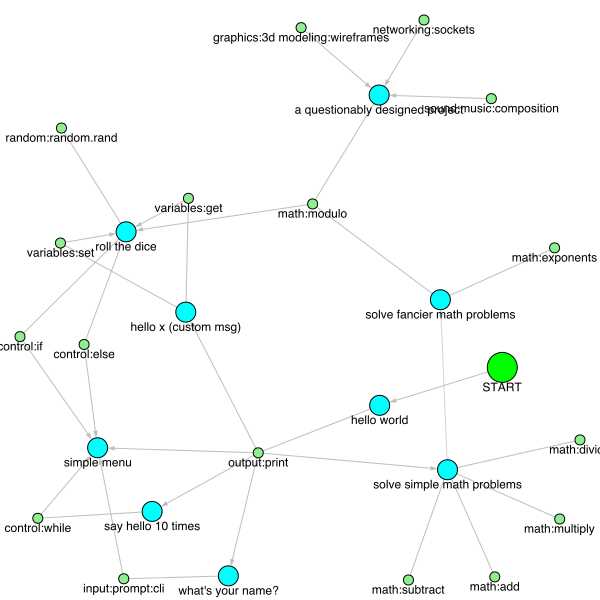

In [33]:
lp = LearningPlan(library)
lp.render_graph()

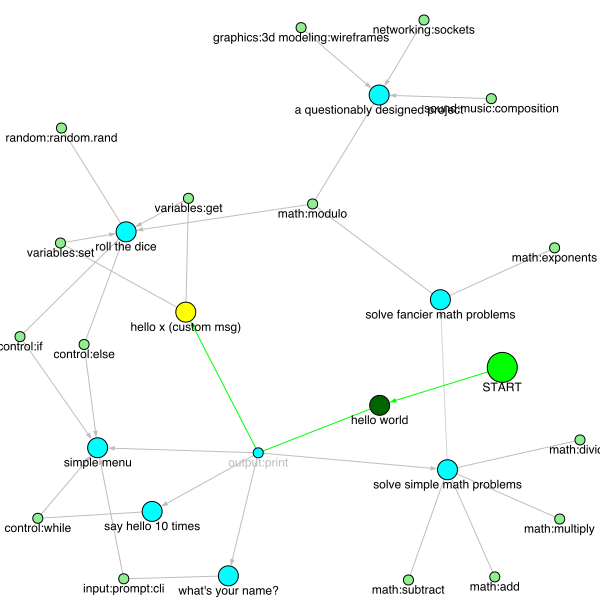

In [34]:
lp.add_goal("Hello X (custom msg)")
lp.render_graph()

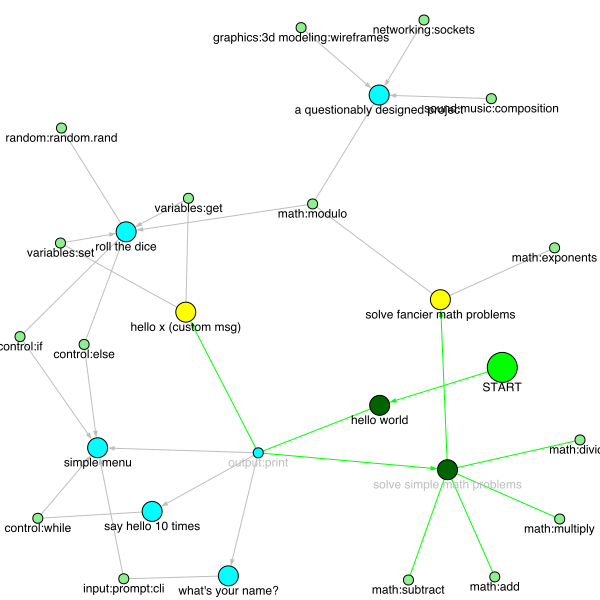

In [35]:
lp.add_goal("solve fancier math problems")
lp.render_graph()